*Lab Assignment*

1. Create a scatter plot from the dataset using two variables, Avg_Credit_Limit and Total_Credit_Card. Determine whether the data distribution can be considered linear.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
from sklearn.neighbors import NearestNeighbors

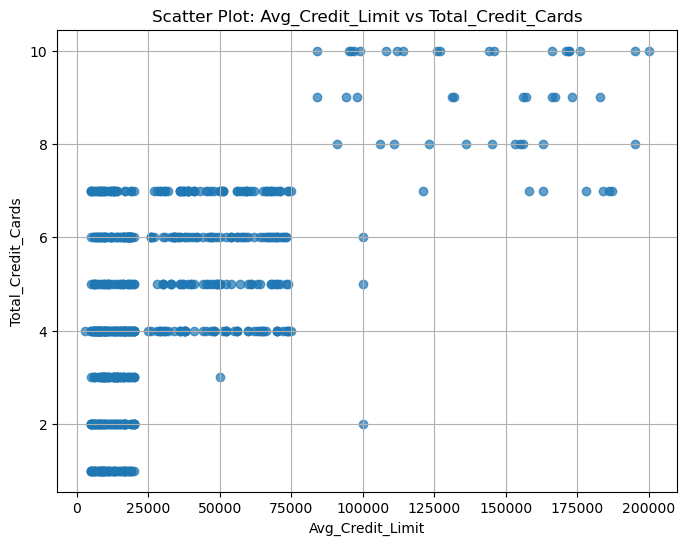

In [25]:
# 1. Load dataset dari CSV
df = pd.read_csv("CC_Customer_Dataset.csv")

# 2. Scatter plot: Avg_Credit_Limit vs Total_Credit_Cards
plt.figure(figsize=(8, 6))
plt.scatter(df['Avg_Credit_Limit'], df['Total_Credit_Cards'], alpha=0.7)
plt.title('Scatter Plot: Avg_Credit_Limit vs Total_Credit_Cards')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.grid(True)
plt.show()


2. Build a clustering model using K-Means. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value.

c:\Users\ArkaT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\ArkaT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\ArkaT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\ArkaT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

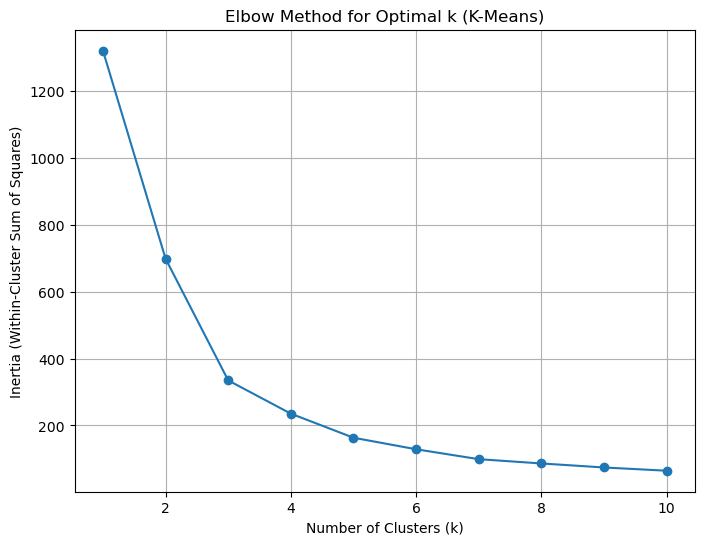

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Select features to be used for clustering
features_kmeans = df[['Avg_Credit_Limit', 'Total_Credit_Cards']]

# Step 2: Normalize the features (standardize to mean=0 and std=1)
scaler = StandardScaler()
scaled_kmeans = scaler.fit_transform(features_kmeans)

# Step 3: Apply Elbow Method by calculating inertia for different values of k
inertia = []  # List to store the inertia values
k_range = range(1, 11)  # Trying k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_kmeans)
    inertia.append(kmeans.inertia_)  # Add the inertia (sum of squared distances)

# Step 4: Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


3. Visualize the clustering results from the K-Means model using a scatter plot.

c:\Users\ArkaT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


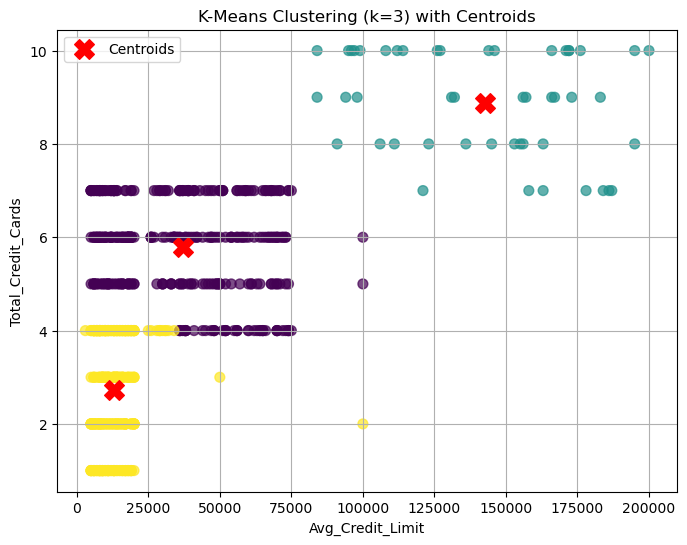

In [27]:
# Assume optimal number of clusters
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)

# Fit model and assign cluster labels
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_kmeans)

# Inverse-transform centroids to original scale
centroids = kmeans.cluster_centers_  # in scaled space
centroids_original = scaler.inverse_transform(centroids)  # convert to original units

# Scatter plot with centroid markers
plt.figure(figsize=(8, 6))

# Plot data points with cluster coloring
plt.scatter(df['Avg_Credit_Limit'], df['Total_Credit_Cards'],
            c=df['KMeans_Cluster'], cmap='viridis', alpha=0.7, s=50)

# Plot centroids as red X markers
plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
            c='red', marker='X', s=200, label='Centroids')

plt.title(f'K-Means Clustering (k={k_opt}) with Centroids')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.legend()
plt.grid(True)
plt.show()



4. Build a clustering model using DBSCAN with all available variables.

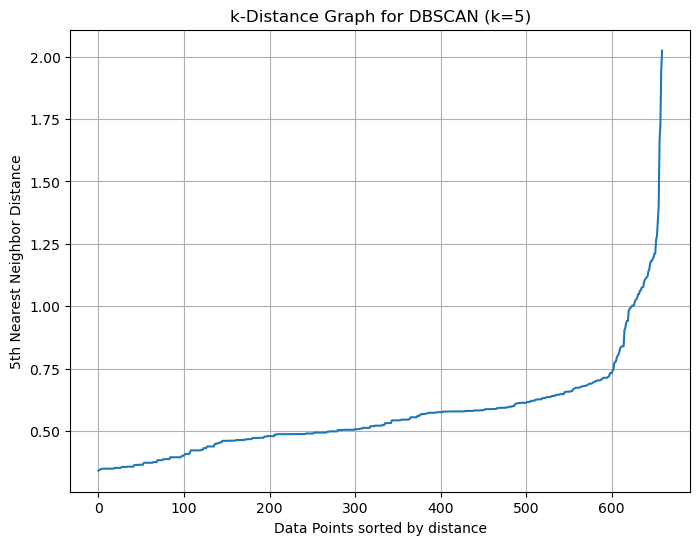

In [28]:
# Select all numeric features (drop IDs and existing cluster labels)
features_all = df.drop(columns=['Sl_No', 'Customer Key', 'KMeans_Cluster'], errors='ignore')

# Normalize all selected features
scaled_all = scaler.fit_transform(features_all)

# Use NearestNeighbors to compute distances to the 5 nearest neighbors
neighbors = NearestNeighbors(n_neighbors=5)  # You can adjust this if needed
neighbors_fit = neighbors.fit(scaled_all)

# Compute the distance to the 5th nearest neighbor for each data point
distances, indices = neighbors_fit.kneighbors(scaled_all)

# Sort the distances to get the "k-distance" graph
distances = np.sort(distances[:, 4])  # 4th index = 5th neighbor (indexing starts at 0)

# Plot the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('k-Distance Graph for DBSCAN (k=5)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.grid(True)
plt.show()


5. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value.

To determine the optimal number of clusters (k) for K-Means clustering, we applied the Elbow Method. This method involves running the K-Means algorithm for a range of cluster numbers (e.g., k = 1 to 10) and calculating the inertia for each value of k. Inertia is the within-cluster sum of squared distances between each point and its corresponding cluster center. It reflects how tightly the data points in each cluster are grouped.

The result was visualized in a line chart, where:

- The X-axis represents the number of clusters (k), and

- The Y-axis represents the inertia value.

As expected, inertia decreases as k increases, because adding more clusters reduces the distance between points and their centroids. However, after a certain point, the reduction in inertia becomes minimal. This point is referred to as the "elbow" of the curve.

In our analysis, the elbow clearly appeared at k = 3. Up to this point, the inertia decreased significantly, but beyond k = 3, the rate of improvement slowed down. Therefore, k = 3 was chosen as the optimal number of clusters.

This selection ensures a balance between model simplicity and performance:

- It avoids underfitting (too few clusters, high error),

- And also prevents overfitting (too many clusters, unnecessary complexity).


6. Calculate the silhouette score and Davies–Bouldin Index (DBI) for the DBSCAN model.

In [29]:
# Apply DBSCAN clustering (you selected eps = 1.5)
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_all)

# Evaluate the clustering with Silhouette Score and DBI
labels = df['DBSCAN_Cluster']

# Handle situation where DBSCAN may produce noise (-1 label) or too few clusters
if len(set(labels)) > 1 and -1 in labels and len(set(labels)) > 2:
    # Exclude noise points for evaluation
    filtered_df = df[df['DBSCAN_Cluster'] != -1]
    filtered_scaled = scaler.fit_transform(filtered_df[features_all.columns])

    sil_score = silhouette_score(filtered_scaled, filtered_df['DBSCAN_Cluster'])
    dbi = davies_bouldin_score(filtered_scaled, filtered_df['DBSCAN_Cluster'])
else:
    # Use all points including noise if necessary
    sil_score = silhouette_score(scaled_all, labels)
    dbi = davies_bouldin_score(scaled_all, labels)

print(f"Silhouette Score (DBSCAN): {sil_score:.4f}")
print(f"Davies-Bouldin Index (DBSCAN): {dbi:.4f}")


Silhouette Score (DBSCAN): 0.3743
Davies-Bouldin Index (DBSCAN): 0.5772
